# Торговое предприятие
### Эконометрический анализ продаж (в млн. $) торговой сети

#### Импортируем нужные библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.graphics import tsaplots
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import shapiro, jarque_bera, spearmanr, pearsonr, t, f
from statsmodels.stats.diagnostic import het_white, acorr_breusch_godfrey, het_goldfeldquandt

In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Прочтем датасет, посмотрим на информацию по типам переменных, проведем категориальный анализ и построим корреляционную матрицу между всеми значениями

Датасет: https://www.kaggle.com/datasets/dermisfit/foodmart-dataset

In [2]:
# df_mall_raw = pd.read_csv('Mall_adv_research.csv')
df_mall_raw = pd.read_excel(open('StoresData.xlsx', 'rb'), sheet_name='Stores-Data')
df_mall_raw

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014,Unnamed: 26,Unnamed: 27
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,12,2,38,46,Del:No,0,171,178,NaN,NaN
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,16,1,38,73,Del:No,0,168,178,NaN,NaN
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,9,2,39,64,Del:No,0,180,188,NaN,NaN
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,9,2,38,66,Del:Yes,1,173,180,NaN,NaN
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,4,3,40,29,Del:No,0,166,171,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,9,3,35,63,Del:No,0,163,172,NaN,NaN
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,12,3,42,35,Del:No,0,178,186,NaN,NaN
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,8,3,45,48,Del:No,0,166,172,NaN,NaN
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,13,3,40,34,Del:No,0,174,182,NaN,NaN


### Предварительный анализ данных

In [3]:
df_mall_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

In [4]:
df_mall_raw.describe()

,Store No.,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,...,Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014,Unnamed: 26,Unnamed: 27
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,0.0,0.0
mean,75.500000,11.659333,2.376667,61.493333,1.913333,3.033333,8.846667,1.009953,147.273333,2.506667,...,38.420000,9.253333,2.813333,37.786667,44.186667,0.300000,171.806667,178.846667,NaN,NaN
std,43.445368,3.570989,0.567866,14.605206,0.767954,1.894594,5.442483,0.645794,67.994265,1.744586,...,7.337748,3.985185,1.183707,4.899783,22.162725,0.459793,8.005616,8.637158,NaN,NaN
min,1.000000,5.900000,1.500000,35.000000,1.000000,1.000000,1.000000,0.018000,20.000000,0.000000,...,27.000000,1.000000,1.000000,24.000000,8.000000,0.000000,156.000000,162.000000,NaN,NaN
25%,38.250000,8.825000,1.900000,51.000000,1.000000,1.000000,4.250000,0.511000,101.000000,1.000000,...,33.000000,7.000000,2.000000,35.000000,26.000000,0.000000,164.000000,171.000000,NaN,NaN
50%,75.500000,10.950000,2.200000,58.000000,2.000000,3.000000,7.500000,0.975000,130.500000,2.000000,...,37.000000,9.000000,3.000000,38.000000,39.500000,0.000000,172.000000,179.000000,NaN,NaN
75%,112.750000,14.000000,2.700000,69.750000,2.750000,4.000000,12.000000,1.415000,196.750000,4.000000,...,43.000000,12.000000,3.000000,41.000000,58.000000,1.000000,178.000000,185.000000,NaN,NaN
max,150.000000,23.500000,3.900000,117.000000,3.000000,8.000000,24.000000,2.872000,369.000000,7.000000,...,61.000000,21.000000,6.000000,50.000000,114.000000,1.000000,201.000000,204.000000,NaN,NaN


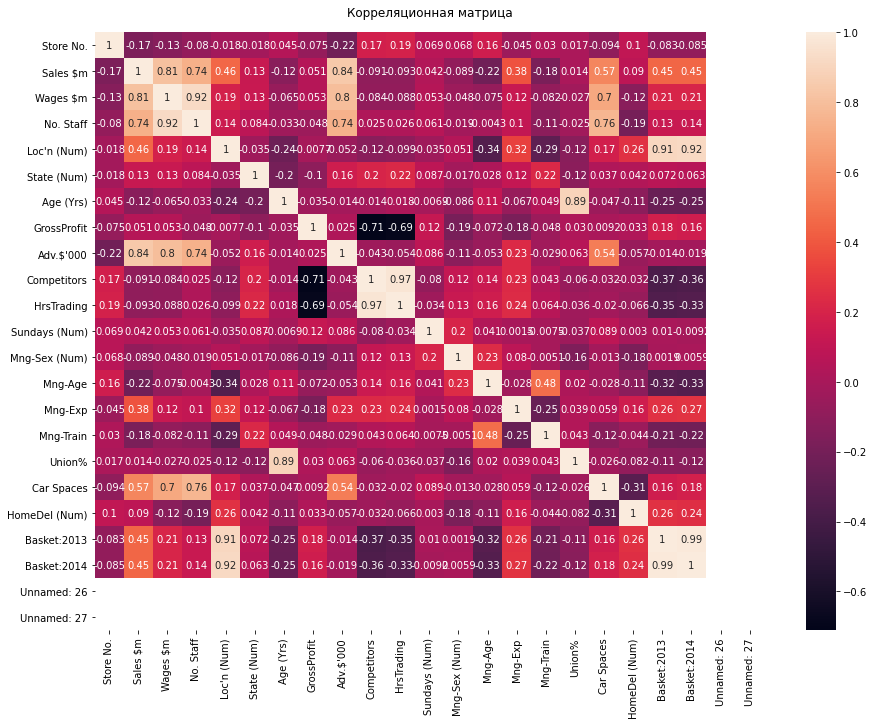

In [5]:
plt.subplots(figsize=(15, 11))
heat_map_raw_mall = sns.heatmap(df_mall_raw.corr(), annot = True)
plt.title("Корреляционная матрица", pad=16)
plt.show()

array([[<AxesSubplot: title={'center': "Loc'n (Num)"}>]], dtype=object)

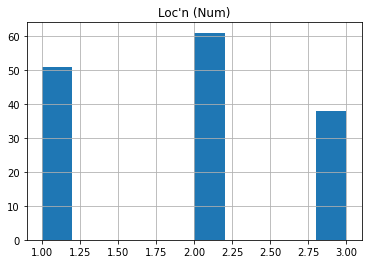

In [6]:
df_mall_raw.hist(column="Loc'n (Num)")

array([[<AxesSubplot: title={'center': 'Sales $m'}>]], dtype=object)

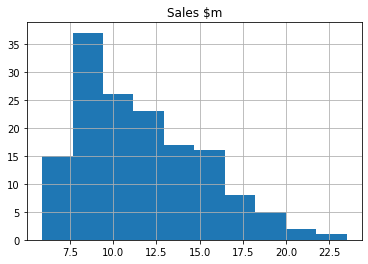

In [7]:
df_mall_raw.hist(column="Sales $m")

array([[<AxesSubplot: title={'center': 'Wages $m'}>]], dtype=object)

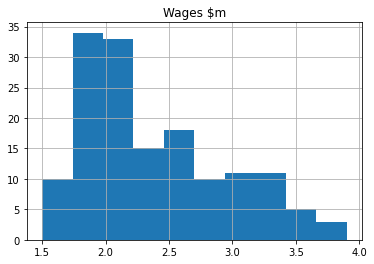

In [8]:
df_mall_raw.hist(column="Wages $m")

array([[<AxesSubplot: title={'center': 'No. Staff'}>]], dtype=object)

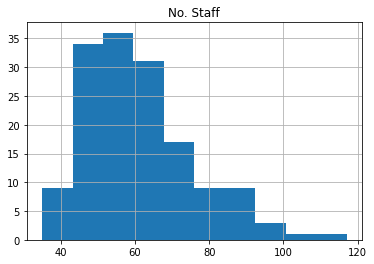

In [9]:
df_mall_raw.hist(column="No. Staff")

array([[<AxesSubplot: title={'center': 'Mng-Exp'}>]], dtype=object)

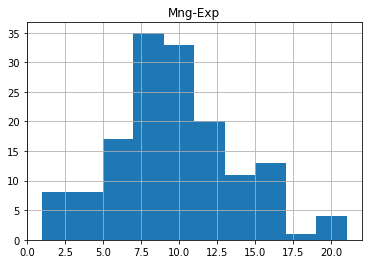

In [10]:
df_mall_raw.hist(column="Mng-Exp")

array([[<AxesSubplot: title={'center': "Adv.$'000"}>]], dtype=object)

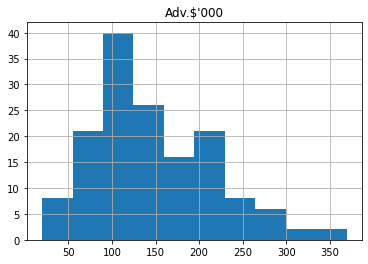

In [11]:
df_mall_raw.hist(column="Adv.$'000")

array([[<AxesSubplot: title={'center': 'Car Spaces'}>]], dtype=object)

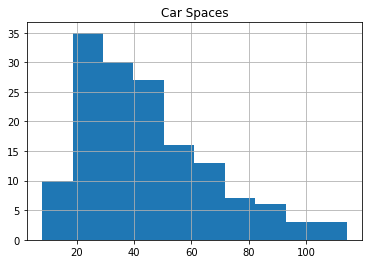

In [12]:
df_mall_raw.hist(column="Car Spaces")

### Выберем необходимые экзогенные и эндогенные переменные и построим модель

В качестве эндогенной переменной (Y) будет выступать “Sales”, а в качестве экзогенных переменных “Adv_costs”, “Staff_exp”, “Car_Spaces”. Выбраны экзогенные переменные были по причине того, что являются отличными друг от друга бизнес-показателями, а также имеют нормальное распределение.

Sales $m - Общая выручка от продаж по каждому супермаркету за финансовый год.

Mng-Exp - Количество лет опыта работы в какой-либо форме младшего / старшего руководства.

Car Spaces - Количество парковочных мест.

Adv.$'000 - Расходы на рекламу и стимулирование сбыта за финансовый год.

In [13]:
df_mall = df_mall_raw[["Sales $m", "Mng-Exp", "Car Spaces", "Adv.$'000"]]
df_mall = df_mall.rename(columns={"Sales $m": "Sales",
                        "Mng-Exp": "Staff_exp", 
                        "Car Spaces": "Car_Spaces",
                        "Adv.$'000": "Adv_costs"})
df_mall

,Sales,Staff_exp,Car_Spaces,Adv_costs
0,12.5,12,46,171
1,14.5,16,73,213
2,19.0,9,64,255
3,18.2,9,66,287
4,7.6,4,29,112
...,...,...,...,...
145,14.1,9,63,253
146,8.1,12,35,20
147,13.6,8,48,103
148,10.0,13,34,120


In [14]:
Sales = df_mall.Sales.to_numpy()
Staff_exp = df_mall.Staff_exp.to_numpy()
Car_Spaces = df_mall.Car_Spaces.to_numpy()
Adv_costs = df_mall.Adv_costs.to_numpy()

In [15]:
mall_model = sm.OLS.from_formula('Sales ~ Adv_costs+Staff_exp+Car_Spaces', data=df_mall)
fitted_mall_model = mall_model.fit()
fitted_mall_model.params

Intercept     3.200868
Adv_costs     0.036432
Staff_exp     0.190925
Car_Spaces    0.030015
dtype: float64

In [16]:
print(fitted_mall_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     164.8
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.13e-46
Time:                        12:29:21   Log-Likelihood:                -292.37
No. Observations:                 150   AIC:                             592.7
Df Residuals:                     146   BIC:                             604.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2009      0.457      7.002      0.0

In [17]:
Df_model = len(df_mall.columns)-1
Df_model

3

In [18]:
Df_residuals = len(df_mall) - Df_model - 1
Df_residuals

146

### Проверка выполнения предпосылки о гомоскедастичности остатков модели

#### Подсчет остатков модели

In [19]:
e = fitted_mall_model.resid
e

0     -0.602584
1     -1.706852
2      2.869610
3      0.843749
4     -1.315421
         ...   
145   -1.927510
146    0.828848
147    3.678476
148   -1.075283
149    2.045077
Length: 150, dtype: float64

#### Тест Парка

In [20]:
model_Park = sm.OLS.from_formula('np.log(e**2) ~ np.log(Adv_costs)', data=df_mall)
summary_Park = model_Park.fit()
summary_Park.params

Intercept           -2.119971
np.log(Adv_costs)    0.418858
dtype: float64

In [21]:
print(summary_Park.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(e ** 2)   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.475
Date:                Fri, 10 Feb 2023   Prob (F-statistic):              0.226
Time:                        12:29:23   Log-Likelihood:                -324.67
No. Observations:                 150   AIC:                             653.3
Df Residuals:                     148   BIC:                             659.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.1200      1.69

In [22]:
t_table_Park = t.ppf(0.975, summary_Park.nobs)
t_table_Park

1.9759053308869137

In [23]:
t_val_Park = np.array(summary_Park.tvalues)
t_val_Park

array([-1.25363103,  1.21459175])

In [24]:
t_val_Park > t_table_Park

array([False, False])

##### оба параметра не значимы => H0 принимается

#### Тест Уайта 

In [25]:
white_test = het_white(fitted_mall_model.resid_pearson,  fitted_mall_model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value']

print(dict(zip(labels, white_test)))

{'Test Statistic': 18.364338461367918, 'Test Statistic p-value': 0.03117428072941044}


##### Так как p-value < чем 0.05, то мы не можем принять H0 гипотезу. Можно сказать, что у нас нет достаточных доказательств, что гетероскедастичность отсутствует в данной модели

#### Тест Глейзера

In [26]:
result = [0, 1, 2, 3]
data_glaze = df_mall[['Sales', 'Adv_costs']]
data_glaze.columns = ['Sales', 'Adv_costs']
model_inputs = ['x', 'np.sqrt(x)', 'np.abs(1/x)']

result[1] = sm.OLS.from_formula("np.abs(e) ~ Adv_costs", data = data_glaze).fit().tvalues["Adv_costs"]
result[2] = sm.OLS.from_formula("np.abs(e) ~ np.sqrt(Adv_costs)", data = data_glaze).fit().tvalues["np.sqrt(Adv_costs)"]
result[3] = sm.OLS.from_formula("np.abs(e) ~ np.abs(1/Adv_costs)", data = data_glaze).fit().tvalues["np.abs(1 / Adv_costs)"]

for i in range(3):
    print(f'Model {model_inputs[i]} t-stats : {np.abs(result[i + 1])}', '\n')
print(t.ppf(0.975, fitted_mall_model.nobs))

Model x t-stats : 1.5305889432055901 

Model np.sqrt(x) t-stats : 1.2939348230306043 

Model np.abs(1/x) t-stats : 0.2790392952979923 

1.9759053308869137


In [27]:
glaze_table_val = t.ppf(0.975, fitted_mall_model.nobs)
glaze_table_val

1.9759053308869137

In [28]:
np.abs(result[1]) > glaze_table_val

False

In [29]:
np.abs(result[2]) > glaze_table_val

False

In [30]:
np.abs(result[3]) > glaze_table_val

False

##### Все оценкци не являются значимыми => H0 принимается

#### Тест Голфреда-Квандта

In [31]:
het_goldfeldquandt(e, df_mall.to_numpy())

(0.8486639118418189, 0.754436563084995, 'increasing')

##### p_value > 0.05 => H0 принимается

### После проведения проверок с помощью методов: Парка, Уайта, Глейзера, Голфреда-Квандта мы можем сделать вывод о том, что остатки гомоскедастичны

### Проверим выполнение предпосылки об остутствии автокорреляции остатков модели

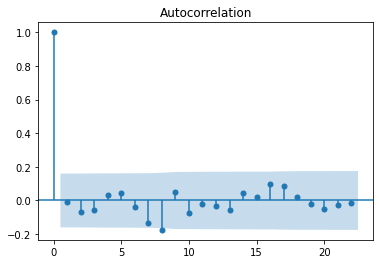

In [32]:
fig = tsaplots.plot_acf(e)
plt.show()

In [33]:
d = {'e-1': np.array(e[:-1]), 'e': np.array(e[1:])}
df_e = pd.DataFrame(data=d)
df_e

,e-1,e
0,-0.602584,-1.706852
1,-1.706852,2.869610
2,2.869610,0.843749
3,0.843749,-1.315421
4,-1.315421,2.563774
...,...,...
144,-1.675895,-1.927510
145,-1.927510,0.828848
146,0.828848,3.678476
147,3.678476,-1.075283


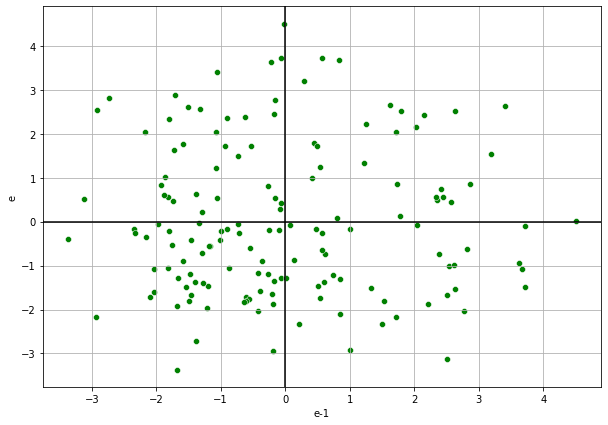

In [34]:
plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df_e, x="e-1", y="e", color="green")
plt.grid(linestyle='-')
plt.axhline(y=0, linewidth=1.5, color="black")
plt.axvline(x=0, linewidth=1.5, color="black")
plt.show()

#### тест критерий Дарбина-Уотсона

In [35]:
durbin_watson(fitted_mall_model.resid)

2.0060098794899908

In [36]:
dl = 1.69
du = 1.77
a = 0
b = 4

print(f'{a}---{dl}---{du}---{b-du}---{b-dl}---{b}')
print(' cov>0        cov=0         cov>0')

0---1.69---1.77---2.23---2.31---4
 cov>0        cov=0         cov>0


##### dw = 2.0060098794899903 . Он попадает в отрезок (du;4-du) => гипотеза H0 принимается => автокорреляции отстатков нет

#### тест Бройша-Годфри

In [62]:
breusch_godfrey = acorr_breusch_godfrey(fitted_mall_model)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, breusch_godfrey)))

{'Test Statistic': 14.038142013130827, 'Test Statistic p-value': 0.3711633153373246, 'F-Statistic': 1.0563329561072785, 'F-Test p-value': 0.4026167928035795}


##### p-value = 0.37116331533732555 > 0.05 => H0 принимается => автокорреляция отсутствует

### После проведения проверок с помощью методов: Дарбина-Уотсона, Бройша-Годфри мы можем сделать вывод о том, что автокорреляция остатков отсутствует

### Оценим модель с помощью f и t критерия

#### Оценим параметры множественной линейной регрессии, предполагая, что соблюдаются условия теоремы Гаусса-Маркова

In [38]:
t_table = t.ppf(0.975, fitted_mall_model.nobs)
t_table

1.9759053308869137

In [39]:
t_values = np.array(fitted_mall_model.tvalues)
t_values

array([ 7.0017592 , 14.40237065,  5.23526567,  3.96486925])

In [40]:
t_values > t_table

array([ True,  True,  True,  True])

##### B0_tнабл > t_table => гипотеза H0 принимается => параметр значим

##### Adv_costs_t_набл > t_table => гипотеза H0 принимается => параметр значим

##### Staff_exp_t_набл > t_table => гипотеза H0 принимается => параметр значим

##### Car_Spaces_t_набл > t_table => гипотеза H0 принимается => параметр значим

#### Оценим модель, предполагая, что соблюдаются условия теоремы Гаусса-Маркова

In [41]:
f_table = f.isf(0.05, Df_model, Df_residuals)
f_table

2.6665742133041834

In [42]:
f_value = fitted_mall_model.fvalue
f_value

164.82406213304637

In [43]:
f_value > f_table

True

##### f_набл > f_table => гипотеза H0 принимается => модель значима

#### Коэффициенты детерминации

Коэффициент детерминации

In [44]:
fitted_mall_model.rsquared

0.7720431845435151

Скорректированный коэффициент детерминации

In [45]:
fitted_mall_model.rsquared_adj

0.7673591403902996

#### Ошибка апроксимации

In [46]:
mean_absolute_percentage_error(df_mall["Sales"].to_numpy(), fitted_mall_model.fittedvalues)

0.12691172848797735

##### Можно сделать вывод, что качество модели среднее по причине того, что: коэффициент корреляции является невысоким для малой выборки, а ошибка апроксимации выше 10%

### Сравнение текущих значений и предсказанных значений

###### `Текущие значения`

In [47]:
df_mall[["Sales"]]

,Sales
0,12.5
1,14.5
2,19.0
3,18.2
4,7.6
...,...
145,14.1
146,8.1
147,13.6
148,10.0


###### `Предсказанные значения`

In [48]:
pr = pd.DataFrame(fitted_mall_model.fittedvalues, columns=["Predicted_Sales"])
pr

,Predicted_Sales
0,13.102584
1,16.206852
2,16.130390
3,17.356251
4,8.915421
...,...
145,16.027510
146,7.271152
147,9.921524
148,11.075283


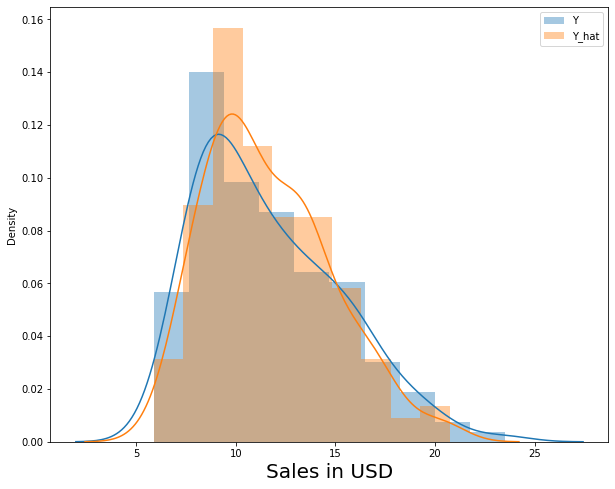

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df_mall["Sales"], ax=ax, label='Y').legend()
sns.distplot(pr, ax=ax, label='Y_hat').legend()
ax.set_xlabel('Sales in USD', size=20)
plt.show()

### Аналитический блок

In [61]:
# df_mall_raw

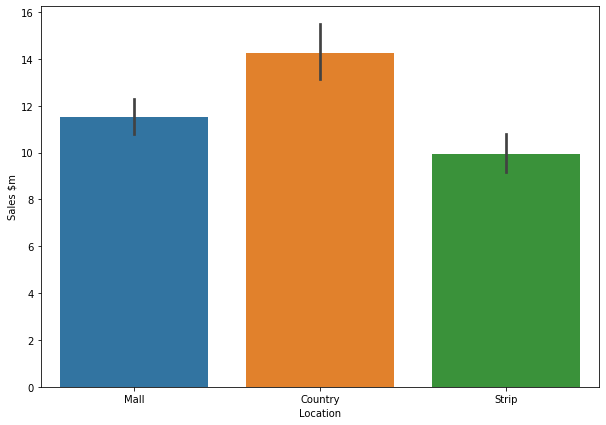

In [119]:
plt.subplots(figsize=(10, 7))
sns.barplot(data=df_mall_raw, x="Location", y="Sales $m")
plt.show()

##### Можно сделать вывод что самая большие продажи приходятся на торговые центры в городах с населением < 20 тыс. чел

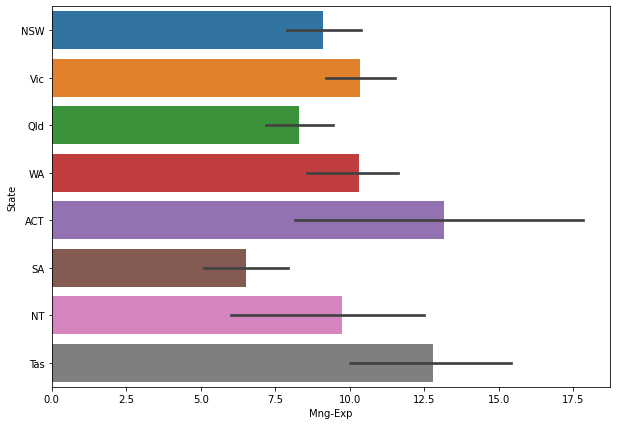

In [120]:
# plt.subplots(figsize=(13, 9))
plt.subplots(figsize=(10, 7))
sns.barplot(data=df_mall_raw, y="State", x="Mng-Exp")
plt.show()

##### Можно сделать вывод из того что самые опытные сотрудники находятся в центральной части Австралии

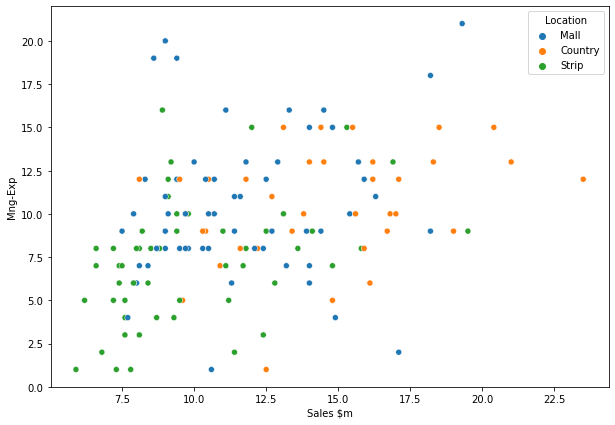

In [121]:
plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df_mall_raw, x="Sales $m", y="Mng-Exp", hue="Location")
plt.show()

##### Самый низкий показатель продаж приходится на торговые центры на улицах города. Это ожидаемо учитывая что зачастую в этих магазинах работают малоопытные сотрудники

### Подводя итоги, можно сказать, что, во-первых, был проведен анализ данных, которые были представлены выше. Было выявлено, что самая большая выручка приходится на магазины в городах с населением < 20 тыс. чел. Кроме того, было установлено, что самые опытные сотрудники работают в столичном штате (ACT, Канберра и ее пригороды). Вдобавок было установлено, что самый низкий показатель продаж приходится на небольшие торговые центры (Strip), из-за неопытности сотрудников. 

### Во-вторых, была построена модель регрессии на основе эндогенной переменной “Sales” и экзогенных переменных “Adv_costs”, “Staff_exp”, “Car_Spaces”. В ходе ее анализа была выявлена гомоскедастичность и отклонено предположение о наличии автокорреляции. 

### В-третьих, было установлено насколько новая модель является качественной. 

### По итогам всех действий можно смело заявить, что модель имеет среднее качество. Кроме того можно сказать, что какой бы большой ни была выручка, она не является единственным фактором, который оказывает влияние на успешность бизнеса.